In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import wasserstein_distance, ks_2samp

import matplotlib.pyplot as plt

def view_single_distribution(
    df,
    metric="area",
    bins=50,
    density=True,
    ax=None,
    title_prefix=""
):
    """
    View a histogram of a single metric from a DataFrame containing
    columns like: ['video', 'frame', 'area', 'eccentricity', 'solidity', 'perimeter'].

    Args:
        df (pd.DataFrame): The input DataFrame.
        metric (str): Which column to visualize, e.g. 'area', 'eccentricity', 'solidity', 'perimeter'.
        bins (int): Number of histogram bins.
        density (bool): Whether to normalize the histogram (density=True) or show counts (density=False).
        ax (matplotlib.axes.Axes, optional): Matplotlib Axes to plot on. 
            If None, a new figure/axes is created.
        title_prefix (str, optional): An optional prefix added to the plot title (e.g. "Real" or "Generated").

    Returns:
        matplotlib.axes.Axes: The axes on which the histogram was plotted.
    """
    if metric not in df.columns:
        raise ValueError(
            f"Metric '{metric}' not found in DataFrame columns. "
            f"Available columns: {df.columns.tolist()}"
        )

    # Drop any NaN or invalid values
    values = df[metric].dropna()

    # Create new figure/axes if none provided
    if ax is None:
        fig, ax = plt.subplots(figsize=(8, 6))

    # Plot histogram
    ax.hist(values, bins=bins, alpha=0.7, edgecolor="black", density=density)
    ax.set_title(f"{title_prefix} {metric.capitalize()} Distribution")
    ax.set_xlabel(metric)
    ax.set_ylabel("Density" if density else "Count")

    return ax

def compare_distributions_wasserstein(df_real, df_gen, metric):
    """Compute Wasserstein distance for the given metric."""
    real_values = df_real[metric].dropna()
    gen_values  = df_gen[metric].dropna()
    return wasserstein_distance(real_values, gen_values)

def compare_distributions_ks(df_real, df_gen, metric):
    """Compute KS statistic for the given metric."""
    real_values = df_real[metric].dropna()
    gen_values  = df_gen[metric].dropna()
    ks_stat, ks_pval = ks_2samp(real_values, gen_values)
    return ks_stat, ks_pval

def plot_overlaid_histograms(df_real, df_gen, metric, ax, bins=50):
    """Plot two overlaid histograms for the given metric."""
    real_values = df_real[metric].dropna()
    gen_values  = df_gen[metric].dropna()
    ax.hist(real_values, bins=bins, alpha=0.5, label="Real", density=True)
    ax.hist(gen_values,  bins=bins, alpha=0.5, label="Generated", density=True)
    ax.set_xlabel(metric)
    ax.set_ylabel("Density")
    ax.legend()

In [5]:
BASE_DIR = "../../results/i2v"

dfs = {
    "real": pd.read_csv(f"{BASE_DIR}/checkpoint-900-val-old/all_morphology.csv"),
    "baseline": pd.read_csv(f"{BASE_DIR}/i2v_baseline/all_morphology.csv"),
    "r64_250": pd.read_csv(f"{BASE_DIR}/i2v_r64_250/all_morphology.csv"),
    "r64_500": pd.read_csv(f"{BASE_DIR}/i2v_r64_500/all_morphology.csv"),
    "r64_750": pd.read_csv(f"{BASE_DIR}/i2v_r64_750/all_morphology.csv"),
    "r64_900": pd.read_csv(f"{BASE_DIR}/i2v_r64_900/all_morphology.csv"),
    "r128_250": pd.read_csv(f"{BASE_DIR}/i2v_r128_250/all_morphology.csv"),
    "r128_500": pd.read_csv(f"{BASE_DIR}/i2v_r128_500/all_morphology.csv"),
    "r128_750": pd.read_csv(f"{BASE_DIR}/i2v_r128_750/all_morphology.csv"),
    "r128_900": pd.read_csv(f"{BASE_DIR}/i2v_r128_900/all_morphology.csv"),
    "r256_250": pd.read_csv(f"{BASE_DIR}/i2v_r256_250/all_morphology.csv"),
    "r256_375": pd.read_csv(f"{BASE_DIR}/i2v_r256_375/all_morphology.csv"),
    "r256_750": pd.read_csv(f"{BASE_DIR}/i2v_r256_750/all_morphology.csv"),
    "r256_900": pd.read_csv(f"{BASE_DIR}/i2v_r256_900/all_morphology.csv"),
    "sft_i2v_250": pd.read_csv(f"{BASE_DIR}/sft_i2v_250/all_morphology.csv"),
    "sft_i2v_500": pd.read_csv(f"{BASE_DIR}/sft_i2v_500/all_morphology.csv"),
    "sft_i2v_750": pd.read_csv(f"{BASE_DIR}/sft_i2v_750/all_morphology.csv"),
    "sft_i2v_900": pd.read_csv(f"{BASE_DIR}/sft_i2v_900/all_morphology.csv"),
}

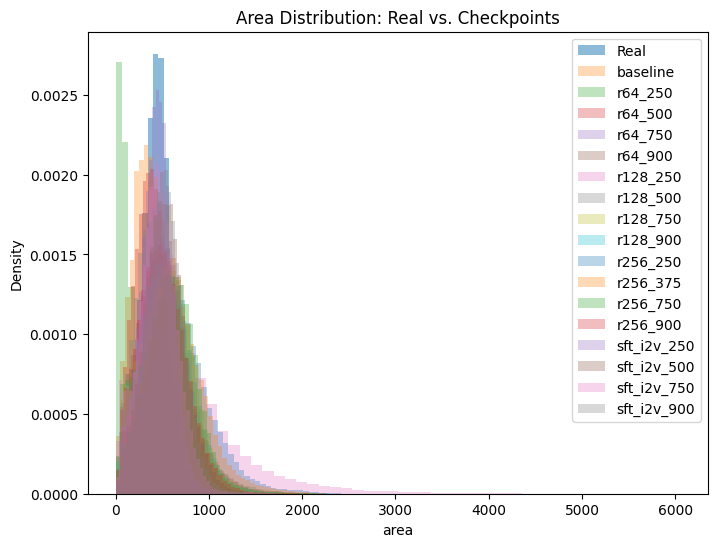

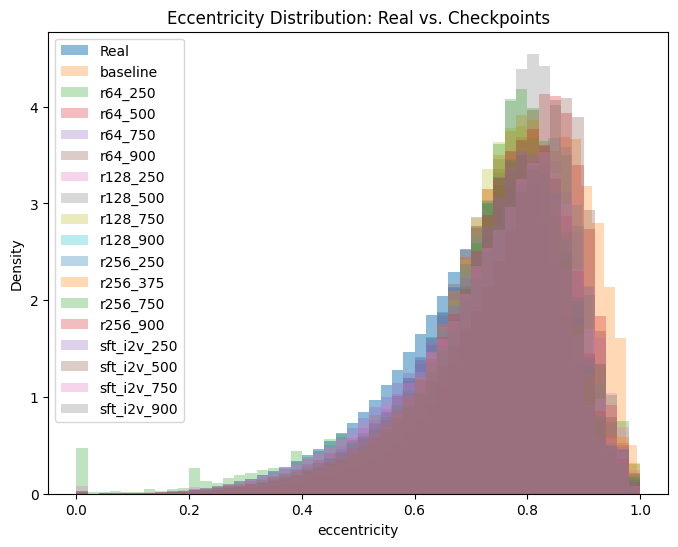

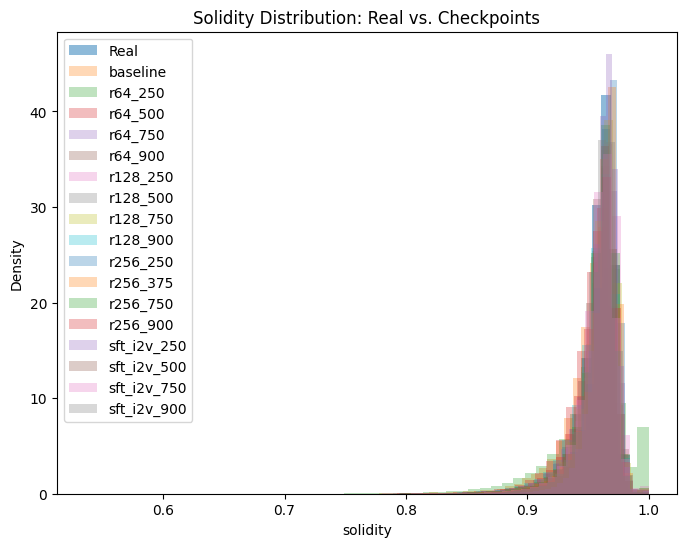

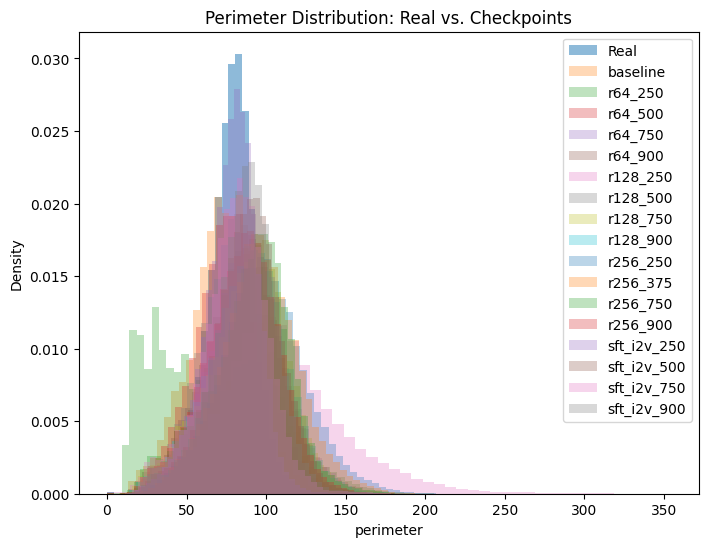

In [6]:
import matplotlib.pyplot as plt

metrics = ["area", "eccentricity", "solidity", "perimeter"]

for metric in metrics:
    plt.figure(figsize=(8,6))
    # Plot real distribution
    plt.hist(dfs["real"][metric].dropna(), bins=50, alpha=0.5, density=True, label="Real")
    
    # Plot each checkpoint overlayed
    for name, df in dfs.items():
        if name == "real":
            continue
        plt.hist(df[metric].dropna(), bins=50, alpha=0.3, density=True, label=name)
    
    plt.title(f"{metric.capitalize()} Distribution: Real vs. Checkpoints")
    plt.xlabel(metric)
    plt.ylabel("Density")
    plt.legend()
    plt.show()

In [7]:
import pandas as pd
from scipy.stats import wasserstein_distance, ks_2samp

metrics = ["area", "eccentricity", "solidity", "perimeter"]
results = []

for checkpoint_name, df_gen in dfs.items():
    if checkpoint_name == "real":
        continue
    for metric in metrics:
        real_vals = dfs["real"][metric].dropna()
        gen_vals  = df_gen[metric].dropna()
        
        wdist  = wasserstein_distance(real_vals, gen_vals)
        ks_stat, ks_pval = ks_2samp(real_vals, gen_vals)
        
        results.append({
            "checkpoint": checkpoint_name,
            "metric": metric,
            "wasserstein_distance": wdist,
            "ks_stat": ks_stat,
            "ks_pval": ks_pval
        })

df_results = pd.DataFrame(results)
df_results

,checkpoint,metric,wasserstein_distance,ks_stat,ks_pval
0,baseline,area,76.074816,0.227933,0.000000e+00
1,baseline,eccentricity,0.066532,0.256849,0.000000e+00
2,baseline,solidity,0.009843,0.227888,0.000000e+00
3,baseline,perimeter,6.363159,0.167868,0.000000e+00
4,r64_250,area,177.271038,0.349018,0.000000e+00
...,...,...,...,...,...
63,sft_i2v_750,perimeter,4.710484,0.130516,0.000000e+00
64,sft_i2v_900,area,88.982630,0.230824,0.000000e+00
65,sft_i2v_900,eccentricity,0.037968,0.142501,0.000000e+00
66,sft_i2v_900,solidity,0.000819,0.025772,8.156935e-119


In [9]:
mean_dists = (
    df_results
    .groupby("checkpoint")["wasserstein_distance"]
    .mean()
    .sort_values()
)
print(mean_dists)

# The top row(s) in this sorted output have the smallest distance on average,
# indicating the best morphological match to real data.

checkpoint
sft_i2v_250      3.561372
sft_i2v_750     11.916397
r64_500         13.972709
r128_500        15.963300
baseline        20.628587
sft_i2v_900     24.482437
r256_900        25.033304
sft_i2v_500     25.961895
r64_900         29.638977
r64_750         30.923452
r128_900        32.803290
r128_750        35.588394
r256_750        40.769088
r64_250         49.491090
r256_375        57.114766
r256_250        67.183605
r128_250       106.732771
Name: wasserstein_distance, dtype: float64


In [13]:
prolif_metrics = [
    "area",
    "eccentricity",
    "solidity",
    "perimeter"
]

for metric in prolif_metrics:
    # Filter rows for this metric
    subdf = df_results[df_results["metric"] == metric].copy()
    
    # Sort by wasserstein_distance ascending (lowest distance = best)
    subdf = subdf.sort_values("wasserstein_distance")
    
    print(f"\n=== Ranking for '{metric}' by Wasserstein Distance ===")
    display(subdf[["checkpoint", "metric", "wasserstein_distance"]])


=== Ranking for 'area' by Wasserstein Distance ===


,checkpoint,metric,wasserstein_distance
52,sft_i2v_250,area,13.110205
60,sft_i2v_750,area,42.926872
8,r64_500,area,50.289329
24,r128_500,area,57.776741
0,baseline,area,76.074816
64,sft_i2v_900,area,88.982630
48,r256_900,area,91.360881
56,sft_i2v_500,area,93.623433
16,r64_900,area,108.973505
12,r64_750,area,113.623712



=== Ranking for 'eccentricity' by Wasserstein Distance ===


,checkpoint,metric,wasserstein_distance
53,sft_i2v_250,eccentricity,0.013619
17,r64_900,eccentricity,0.019714
13,r64_750,eccentricity,0.021093
61,sft_i2v_750,eccentricity,0.025582
37,r256_250,eccentricity,0.028216
29,r128_750,eccentricity,0.028821
33,r128_900,eccentricity,0.029539
5,r64_250,eccentricity,0.031937
49,r256_900,eccentricity,0.034375
41,r256_375,eccentricity,0.037767



=== Ranking for 'solidity' by Wasserstein Distance ===


,checkpoint,metric,wasserstein_distance
66,sft_i2v_900,solidity,0.000819
62,sft_i2v_750,solidity,0.002651
54,sft_i2v_250,solidity,0.002849
30,r128_750,solidity,0.002856
46,r256_750,solidity,0.002908
58,sft_i2v_500,solidity,0.002914
38,r256_250,solidity,0.003051
42,r256_375,solidity,0.003075
14,r64_750,solidity,0.003918
26,r128_500,solidity,0.004064



=== Ranking for 'perimeter' by Wasserstein Distance ===


,checkpoint,metric,wasserstein_distance
55,sft_i2v_250,perimeter,1.118816
63,sft_i2v_750,perimeter,4.710484
11,r64_500,perimeter,5.519073
27,r128_500,perimeter,6.001879
3,baseline,perimeter,6.363159
51,r256_900,perimeter,8.732857
67,sft_i2v_900,perimeter,8.908331
19,r64_900,perimeter,9.558448
15,r64_750,perimeter,10.045084
59,sft_i2v_500,perimeter,10.160923
